In [129]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import re

In [130]:
paths=list(Path('../../output/').glob('*/*.csv'))
mean_df=pd.DataFrame()
rows=np.zeros((6,3))
net_list=[]
for i,path in enumerate(paths):
    df=pd.read_csv(str(path),index_col=0)
    net=re.sub('0716_','',path.parents[0].name)
    net=re.sub('.h5','',net)
    net_list.append(net)
    row=df.iloc[-1:,1:].values[0]
    rows[i]=row


In [142]:
mean_df=pd.DataFrame(rows,columns=['whole','kidney','cancer'])
mean_df['index']=net_list
mean_df.set_index('index',inplace=True)

In [207]:
mean_df.to_csv

,whole,kidney,cancer
index,,,
unet7_c3,0.661701,0.726194,0.186100
unet7_c1,0.826068,0.868466,0.366542
unet8_c3f48,0.813985,0.854963,0.351360
unet8_c3f32,0.812069,0.853777,0.388610
unet7_c5,0.766907,0.795456,0.371373
unet8_c1,0.803101,0.852463,0.386739


<Figure size 432x288 with 0 Axes>

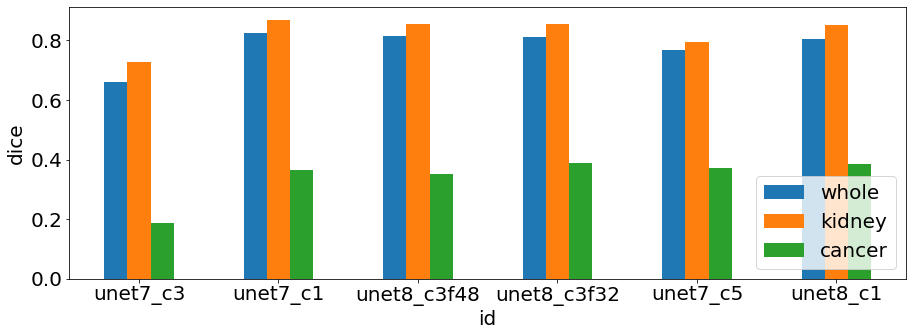

In [144]:
plt.tight_layout()

mean_df.plot.bar(rot=0,figsize=(15,5))
plt.xlabel('id')
plt.ylabel('dice')
plt.legend(loc='lower right')


In [108]:
type(df.iloc[-1:,1:].stack())

pandas.core.series.Series

In [145]:
df=pd.read_csv('../../output/0716_unet8_c1.h5/dice.csv',index_col=1)
plt.tight_layout()
df.iloc[:10,1:].plot.bar(rot=0,figsize=(15,5),mark_right=False,width=0.7)

plt.title('UNet7 channel1')
plt.xlabel('id')
plt.ylabel('dice')
plt.rcParams["font.size"] = 20


df.iloc[10:,1:].plot.bar(rot=0,figsize=(15,5),mark_right=False,width=0.7)


plt.legend(loc='lower right')

FileNotFoundError: [Errno 2] File b'../../output/0716_unet8_c1.h5/dice.csv' does not exist: b'../../output/0716_unet8_c1.h5/dice.csv'

<Figure size 432x288 with 0 Axes>

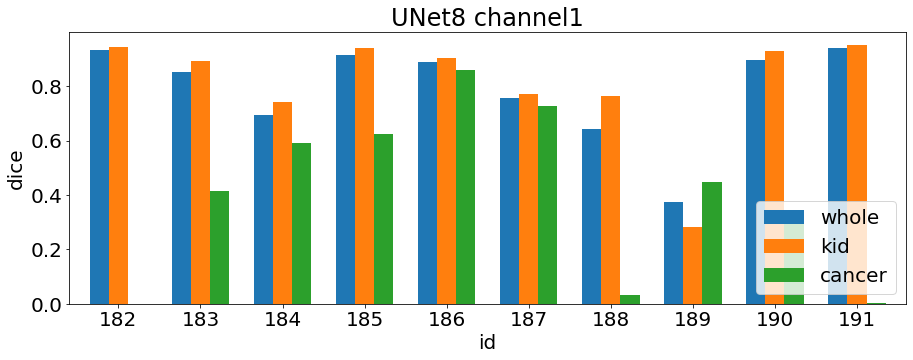

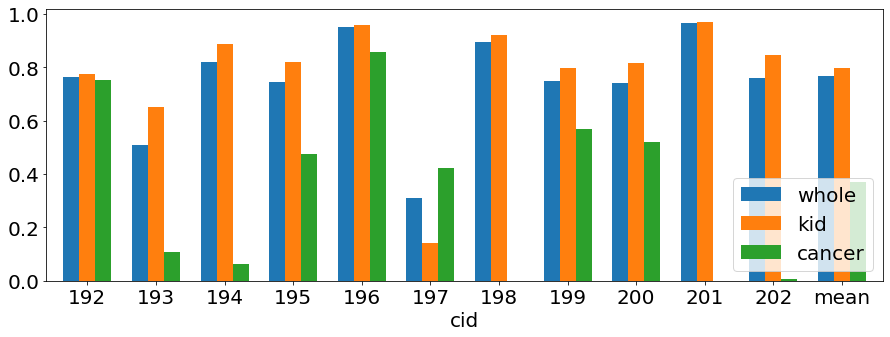

In [148]:
df=pd.read_csv('../../output/0716_unet7_c5.h5/dice.csv',index_col=1)
plt.tight_layout()
df.iloc[:10,1:].plot.bar(rot=0,figsize=(15,5),mark_right=False,width=0.7)
plt.legend(loc='lower right')

plt.title('UNet8 channel1')
plt.xlabel('id')
plt.ylabel('dice')
plt.rcParams["font.size"] = 20


df.iloc[10:,1:].plot.bar(rot=0,figsize=(15,5),mark_right=False,width=0.7)


plt.legend(loc='lower right')

### 各患者のガン含有量を確認

In [176]:
import SimpleITK as sitk
cancer_list=[]
kidney_list=[]
for cid in range(182,203):
    cancer=0
    kidney=0
    for path in list(Path(f'../../data/input/max/sagittal/case_00{str(cid).zfill(3)}/label').glob('*.mha')):
        im=sitk.ReadImage(str(path))
        im=sitk.GetArrayFromImage(im)
        kidney+=np.where(im==1,im,0).sum()
        cancer+=np.where(im==2,im,0).sum()
    cancer_list.append(cancer)
    kidney_list.append(kidney)

print(cancer_list)
print(kidney_list)

[47876.0, 166882.0, 1360402.0, 296090.0, 1422278.0, 1071058.0, 32860.0, 1643344.0, 149236.0, 19792.0, 3066198.0, 85172.0, 21200.0, 706772.0, 351392.0, 1244988.0, 38314.0, 1079522.0, 701864.0, 17276.0, 782394.0]
[2118696.0, 1450150.0, 1675918.0, 2427382.0, 1601204.0, 1386051.0, 1829180.0, 1650705.0, 2148449.0, 1952768.0, 1801541.0, 1383221.0, 1091801.0, 1905109.0, 2001810.0, 1430710.0, 1705753.0, 1956221.0, 1866189.0, 2187212.0, 1529871.0]


In [177]:

cancer_list=np.array(cancer_list)
kidney_list=np.array(kidney_list)

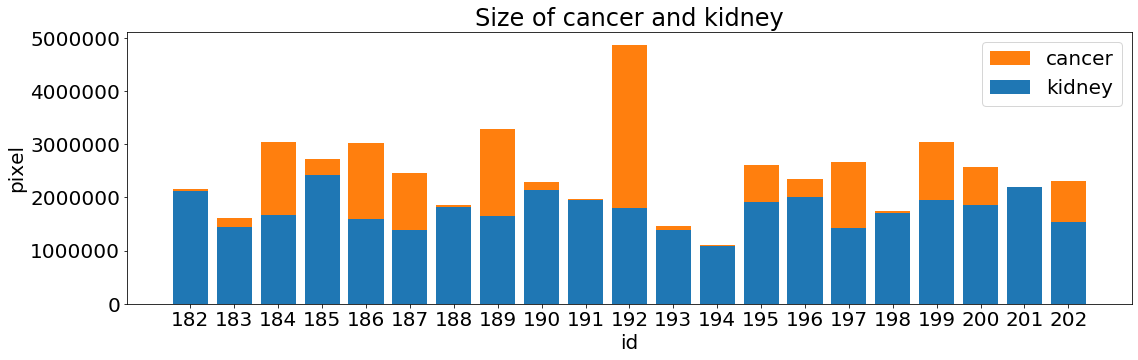

<Figure size 432x288 with 0 Axes>

In [203]:

cids=list(range(182,203))
plt.figure(figsize=(18,5))
p2=plt.bar(cids,kidney_list)
p1=plt.bar(cids,cancer_list,bottom=kidney_list)
plt.xticks(cids)
plt.title('Size of cancer and kidney')
plt.ylabel('pixel')
plt.xlabel('id')

plt.legend((p1[0],p2[0]),('cancer','kidney'))
plt.show()
plt.savefig('./Size_of_cancer_and_kidney.png')

<Figure size 432x288 with 0 Axes>

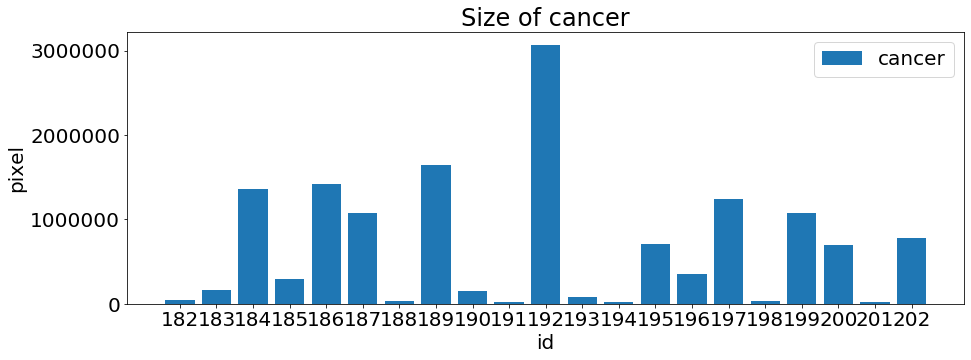

<Figure size 432x288 with 0 Axes>

In [204]:
cids=list(range(182,203))
plt.tight_layout()

plt.figure(figsize=(15,5))
p1=plt.bar(cids,cancer_list,label='cancer')
plt.xticks(cids)
plt.title('Size of cancer')
plt.ylabel('pixel')
plt.xlabel('id')

plt.legend()
plt.show()
plt.savefig('./Size_of_cancer.png')

<Figure size 432x288 with 0 Axes>

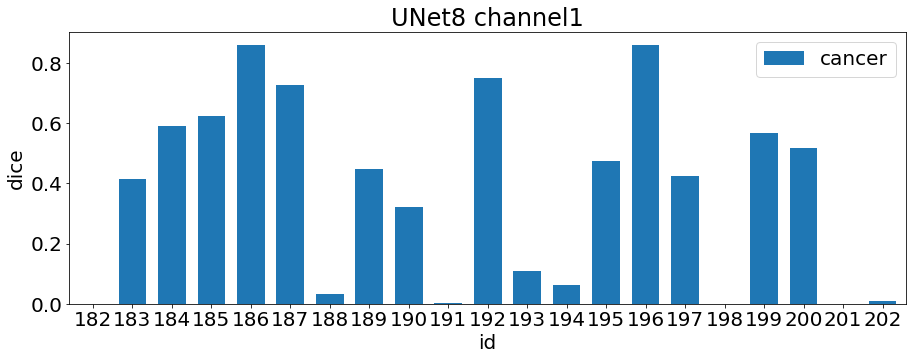

In [205]:
df=pd.read_csv('../../output/0716_unet7_c5.h5/dice.csv',index_col=1)
plt.tight_layout()
df.iloc[:-1,3:].plot.bar(rot=0,figsize=(15,5),mark_right=False,width=0.7)
plt.legend(loc='lower right')

plt.title('UNet8 channel1')
plt.xlabel('id')
plt.ylabel('dice')
plt.rcParams["font.size"] = 20

plt.legend(loc='upper right')
plt.savefig('./Dice_of_cancer.png')

<Figure size 432x288 with 0 Axes>

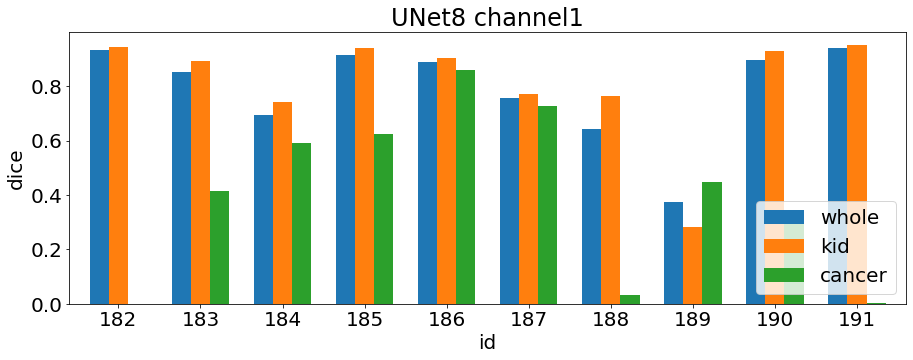

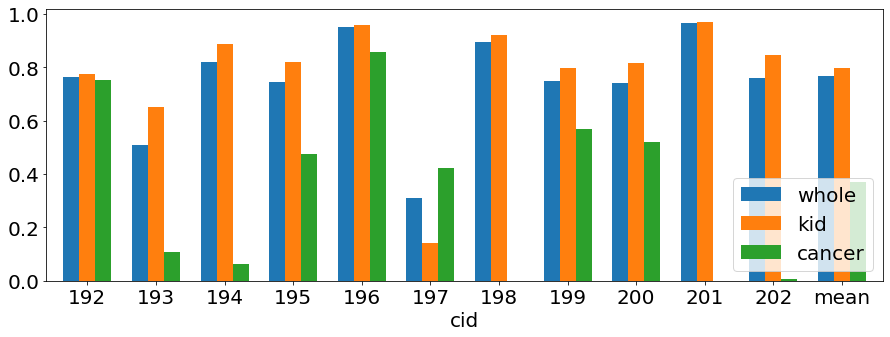

In [206]:
# df=pd.read_csv('../../output/0716_unet8_c1.h5/dice.csv',index_col=1)
plt.tight_layout()
df.iloc[:10,1:].plot.bar(rot=0,figsize=(15,5),mark_right=False,width=0.7)

plt.title('UNet8 channel1')
plt.xlabel('id')
plt.ylabel('dice')
plt.rcParams["font.size"] = 20
plt.legend(loc='lower right')

df.iloc[10:,1:].plot.bar(rot=0,figsize=(15,5),mark_right=False,width=0.7)


plt.legend(loc='lower right')